# Исследование интернет-магазина

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года, и вы планируете кампанию на 2017-й.

## План

#### 1. Открытие файла с данными и изучение общей информации

#### 2. Подготовка данных
* Заменю названия столбцов (приведу к нижнему регистру)
* Преобразую данные в нужные типы
* Обработаю пропуски
* Посчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец

#### 3. Исследовательский анализ данных
* Определю, сколько игр выпускалось в разные годы
* Выберу платформы с наибольшими суммарными продажами и построю распределение по годам
* Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам
* Определю, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построю диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

#### 4. Портрет пользователя каждого региона
* Определю для пользователя каждого региона (NA, EU, JP):
    * Самые популярные платформы 
    * Самые популярные жанры
    
#### 5. Проверка гипотез
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

#### 6. Общий вывод

### Открытие файла и изучение общей информации 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('./datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info() # Посмотрим информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
df.duplicated().sum()

0

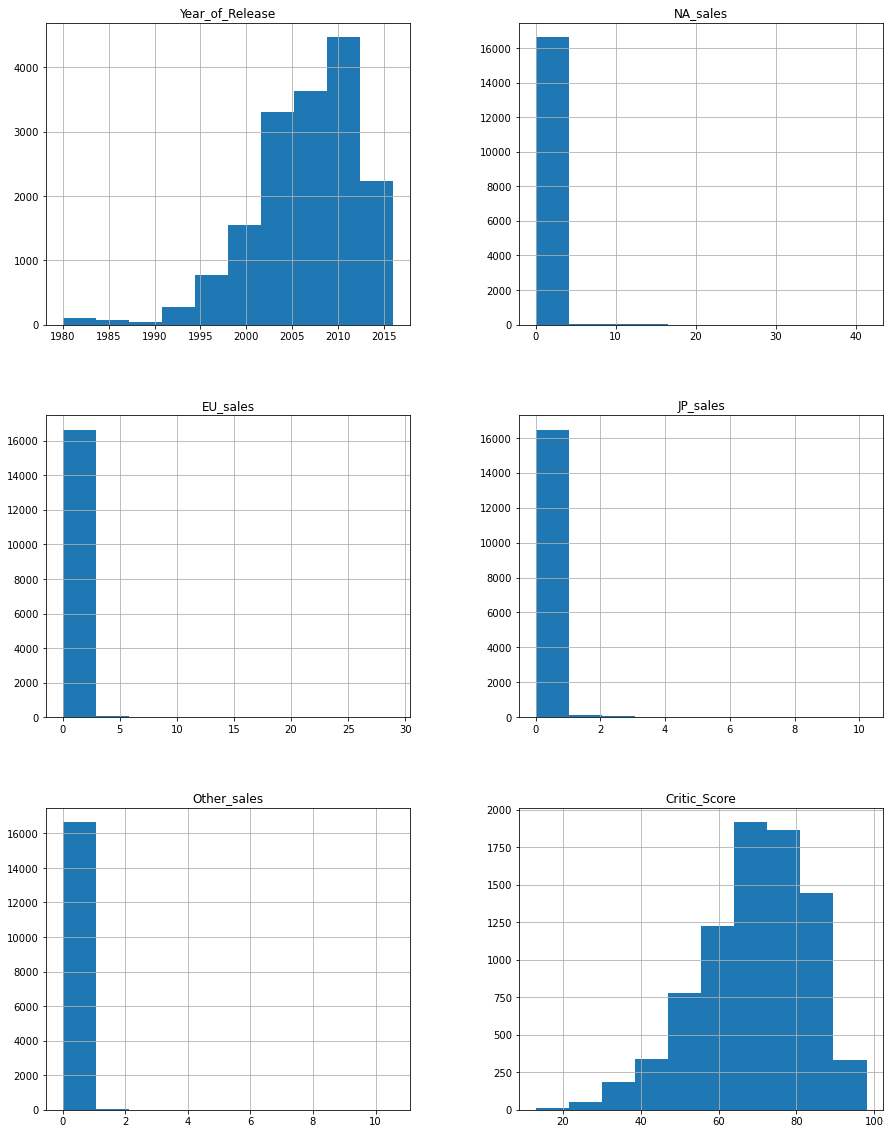

In [7]:
df.hist(figsize=(15, 20));

In [8]:
#Посчитаем количество пустых значений
(
    (df.isna().mean()*100)
        .sort_values(ascending=False)
        .to_frame()
        .rename(columns = {0:'percent_space'})
        .style.background_gradient('coolwarm').format("{:.1f}")
    )

,percent_space
Critic_Score,51.3
Rating,40.5
User_Score,40.1
Year_of_Release,1.6
Genre,0.0
Name,0.0
Other_sales,0.0
JP_sales,0.0
EU_sales,0.0
NA_sales,0.0


In [9]:
#Посмотрим данные с пустыми значениями в столбце Name
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
#Посмотрим данные с пустыми значениями в столбце Year_of_Release     
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
#Посмотрим данные с пустыми значениями в столбце Critic_Score
df[df['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
#Посмотрим данные с пустыми значениями в столбце Rating             
df[df['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
#Посмотрим какие имеются платформы для игр
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [14]:
#Посмотрим какие указаны жанры игр, есть ли повторения
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

В датафрейме 16715 строк, имеются пропуски в столбцах Year_of_Release, user_score, critic_score, rating
Необходимо привести к правильному типу столбец Year_of_Release. Также нужно привести к нижнему регистру столбцы таблицы, а так же сами названия колонок
Имеются пустые значения в столбцах rating, user_score, critic_score.
Дубликатов не имеется

### Подготовка данных

Необходимо:
- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы;
- Обработать пропуски;
- Обработать значение 'tbd' в столбце с оценкой пользователей;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

#### Замена названий, изменение типов данных

In [15]:
# Заменим названия столбцов (приведем к нижнему регистру) 
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [16]:
# Приведем к нижнему регистру следующие столбцы:
for column in df[['name','platform','genre']]:
    df[column] = df[column].str.lower()

Как мы узнали, изучая пропущенные данные столбца name в первом пункте, отсутствуют всего 2 строки, в которых нет существенной информации, поэтому удалим их.

#### Обработка пропусков

In [17]:
df.dropna(subset=['name'], inplace=True)

In [18]:
#Посчитаем в каких платформах есть пропуски 
df[df['year_of_release'].isna()]['platform'].value_counts()

wii     34
ps2     34
x360    30
ds      30
ps3     25
xb      21
pc      17
2600    17
psp     16
gc      14
gba     11
3ds      8
ps       7
n64      3
psv      1
gb       1
Name: platform, dtype: int64

In [19]:
df.dropna(subset=['year_of_release'], inplace=True)

In [20]:
# check
# жизненный срок платформы

years_of_life = df.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

,min,max,years_of_life
platform,,,
2600,1980.0,1989.0,9.0
3do,1994.0,1995.0,1.0
3ds,2011.0,2016.0,5.0
dc,1998.0,2008.0,10.0
ds,1985.0,2013.0,28.0
gb,1988.0,2001.0,13.0
gba,2000.0,2007.0,7.0
gc,2001.0,2007.0,6.0
gen,1990.0,1994.0,4.0


In [21]:
# Изменим тип данных в столбце year_of_release 
df['year_of_release'] = df['year_of_release'].astype(int)

Рассмотрим значения рейтинга

In [22]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

* «E» («Everyone») — «Для всех» (от 6 лет)
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
* «M» («Mature») — «Для взрослых»
* «EC» («Early childhood») — «Для детей младшего возраста»
* «K-A» («Kids to Adults»)— «Для детей и взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»

K-A отнесу к категории E - для всех.
RP - значит рейтинга еще нет, отнесу к Nan. 
AO отнесла к M, чтобы сократить кол-во категорий

In [23]:
df['rating'] = df['rating'].replace('K-A', 'E').replace('AO', 'M').replace('RP', np.nan, regex=True)

In [24]:
df['rating'].value_counts()

E       3924
T       2905
M       1537
E10+    1393
EC         8
Name: rating, dtype: int64

Посчитаем кол-во пропусков на текущий момент

In [25]:
df['rating'].isna().sum()

6677

С помощью функции заполним пропуски рейтинга игр, дублирующихся на других платформах с указанным возрастным ограничением.

In [26]:
#список со всеми играми, имеющими рейтинг
game_rating = df[['name','rating']].drop_duplicates().dropna(subset=['rating']).reset_index(drop=True) 
game_rating['rating'] = game_rating['rating'].replace({ 'EC': '1',
                               'E' : '2',
                               'E10+' : '3',
                               'T' : '4',
                               'M' : '5'
                              })
game_rating

,name,rating
0,wii sports,2
1,mario kart wii,2
2,wii sports resort,2
3,new super mario bros.,2
4,wii play,2
...,...,...
6162,breach,4
6163,bust-a-move 3000,2
6164,mega brain boost,2
6165,storm: frontline nation,3


В это списке есть игры, для которых указан разный рейтинг. Поставим с большим возрастным ограничением

In [27]:
game_rating[game_rating.duplicated(subset=['name'])].sort_values(by='name')

,name,rating
4410,astro boy: the video game,2
2504,avatar: the last airbender,2
5312,barnyard,2
3599,batman begins,3
4968,batman: rise of sin tzu,2
...,...,...
4363,x-men: the official game,3
3313,x2: wolverine's revenge,2
5195,xiaolin showdown,2
5666,young justice: legacy,3


In [28]:
game_rating['rating'] = game_rating.groupby(['name']).transform("max")
game_rating = game_rating.drop_duplicates()
game_rating

,name,rating
0,wii sports,2
1,mario kart wii,2
2,wii sports resort,2
3,new super mario bros.,2
4,wii play,2
...,...,...
6162,breach,4
6163,bust-a-move 3000,2
6164,mega brain boost,2
6165,storm: frontline nation,3


In [29]:
#игры без рейтинга, пропуски в которых мы можем заполнить
games_to_fill_rating= df[df['rating'].isna()] 
games_to_fill_rating_list = list(games_to_fill_rating['name'])
games_to_fill_rating = game_rating.query('name in @games_to_fill_rating_list').reset_index(drop=True)
games_to_fill_rating

,name,rating
0,call of duty: ghosts,5
1,the elder scrolls v: skyrim,5
2,need for speed underground 2,4
3,fifa 14,2
4,donkey kong country returns,2
...,...,...
341,puyo pop fever,2
342,the book of unwritten tales 2,4
343,satisfashion,2
344,banjo-kazooie,2


In [30]:
#Функция для заполнения пропусков рейтинга 
def fill_rating(df,game):
    df['rating'] = df['rating'].fillna(games_to_fill_rating.loc[(games_to_fill_rating['name'] == game), 'rating']\
                                      .replace({ '1': 'EC',
                                                '2' : 'E',
                                                '3' : 'E10+',
                                                '4' : 'T',
                                                '5' : 'M'
                              }))
    return df

In [31]:
for games in list(games_to_fill_rating['name']):
    df = fill_rating(df,games)

In [32]:
#проверям, количество пропусков стало меньше (совсем немного меньше)
df['rating'].isna().sum()

6574

In [33]:
#Заполним оставшиеся значения, чтобы исользовать эти данные при анализе
df['rating'] = df['rating'].fillna('not_defined')

Аббревиатура tbd означает to be determined, to be done. То есть данные в столбцах с рейтингом были нарочно не заполнены, так как не определились с рейтингом. Поэтому создаем новый столбец, чтобы сохранить возможность в дальнейшем перепроверить информацию по рейтингу

In [34]:
#Заменим tbd на Nan и поменяем формат столбца user_score на float
df['user_score_no_tbd'] = df['user_score'].replace('tbd', np.nan, regex=True).astype(float)

In [35]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_no_tbd
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E,8.0
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,M,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E,8.0
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,not_defined,NaN
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,not_defined,NaN
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,not_defined,NaN
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,not_defined,NaN


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

#### Подсчет суммарных продаж

In [36]:
#Создадим новый столбец total_sales и прибавим продажи всех столбцов
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_no_tbd,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E,8.0,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,M,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,8.3,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E,8.0,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,E,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,not_defined,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,not_defined,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,not_defined,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,not_defined,NaN,0.01


In [37]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               16444 non-null  object 
 1   platform           16444 non-null  object 
 2   year_of_release    16444 non-null  int32  
 3   genre              16444 non-null  object 
 4   na_sales           16444 non-null  float64
 5   eu_sales           16444 non-null  float64
 6   jp_sales           16444 non-null  float64
 7   other_sales        16444 non-null  float64
 8   critic_score       7983 non-null   float64
 9   user_score         9839 non-null   object 
 10  rating             16444 non-null  object 
 11  user_score_no_tbd  7463 non-null   float64
 12  total_sales        16444 non-null  float64
dtypes: float64(7), int32(1), object(5)
memory usage: 1.7+ MB


### Исследовательский анализ данных

Необходимо
- Выявить, сколько игр выпускалось в разные годы;
- Определить, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам;
- Выберать несколько потенциально прибыльных платформ;
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
- Проанализировать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами;
- Оценить самые прибыльные жанры и определить выделяются ли жанры с высокими и низкими продажами

#### Распределение количества выпущенных игр

Text(0, 0.5, 'Количество игр')

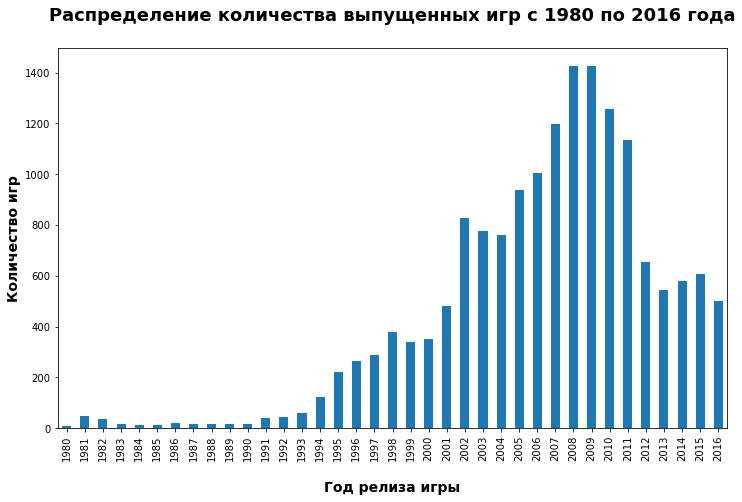

In [38]:
# Отсортируем таблицы и построим график, чтобы просмотреть как менялось количество выпускаемых игр
games_on_period = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_on_period.plot(y='name', kind='bar', figsize=(12, 7), legend=False)

plt.title(label='Распределение количества выпущенных игр с 1980 по 2016 года\n', fontsize=18, fontweight="bold")
plt.xlabel("\nГод релиза игры", fontsize=14, fontweight="bold")
plt.ylabel("Количество игр", fontsize=14, fontweight="bold")

Вывод:

- Из графика видно, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. 
- С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных игр.


#### Платформы с наибольшими продажами, срок жизни платформы

Построим гистограмму, для определения платформ с наибольшими продажами за весь срок наблюдений

,platform,total_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


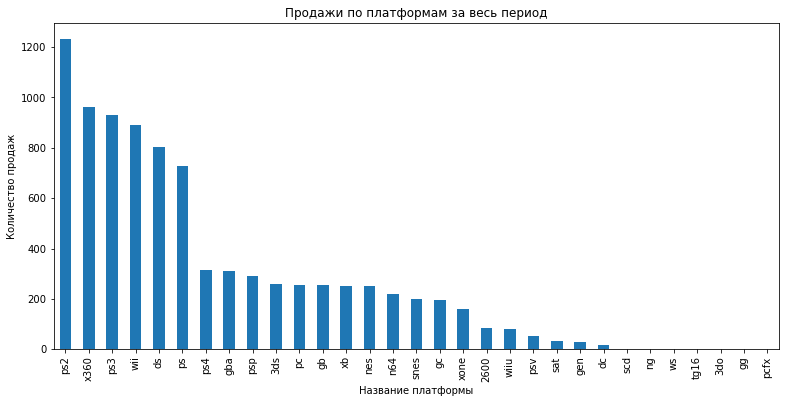

In [39]:
platform_on_sales = df.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
platform_on_sales.plot(y='total_sales', kind='bar', figsize=(13,6), legend=False)
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
top_10_platforms = platform_on_sales.head(10).reset_index().rename_axis(None, axis=1)
list_top_10_platforms = list(top_10_platforms['platform'])
top_10_platforms

Определим разность между датой выхода первой игры и последней, для определения срока жизни платформ

In [40]:
# с помощью сводной таблицы вычислим разность между годом окончания существования платформы и началом
platform_lifetime = df.pivot_table(index='platform',\
                                   values='year_of_release',\
                                   aggfunc=[min, max]).query('platform in @list_top_10_platforms')
platform_lifetime.columns = ['beginnig', 'end']
platform_lifetime['duration'] = platform_lifetime['end'] - platform_lifetime['beginnig']
platform_lifetime

,beginnig,end,duration
platform,,,
3ds,2011,2016,5
ds,1985,2013,28
gba,2000,2007,7
ps,1994,2003,9
ps2,2000,2011,11
ps3,2006,2016,10
ps4,2013,2016,3
psp,2004,2015,11
wii,2006,2016,10


Отфильтруем таблицу, оставив платформы c 1990 года и прекратившие свое существование (после 2013 игры не выпускались). Удалим платформу PC, т.к. это не консоль

In [41]:
# отфильтруем полученную таблицу 
platform_lifetime_filtred = (platform_lifetime
                     .reset_index()
                     .query('beginnig >=1990 and end <= 2013 and platform != "pc"')
                    )
platform_lifetime_filtred['duration'].mean()

9.0

Средняя продолжительность жизни платформы сосотявляет 9 лет

In [42]:
# Напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 1990 года
def year_total_sale_for_platform(name, df):
    return df[(df['platform'] == name) & (df['year_of_release']>1990)].pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

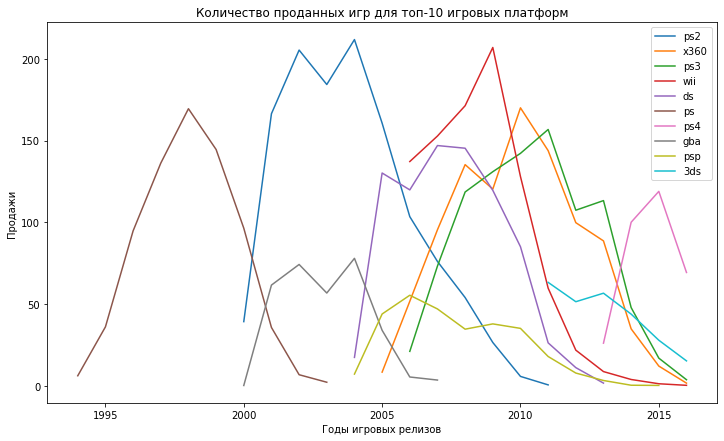

In [43]:
#Отрисуем топ 5 игровых платформ и их поведение за последние 10 лет
plt.figure(figsize=(12,7))
plt.title('Количество проданных игр для топ-10 игровых платформ')
plt.xlabel('Годы игровых релизов')
plt.ylabel('Продажи')

for i in list_top_10_platforms:
    sns.lineplot(data=year_total_sale_for_platform(i,df)['total_sales'], label=i)
    plt.legend()

Вывод:

- В среднем большинство игровых платформ существуют по 10 лет. 
- Cамые продаваемые это Sony Play Station (ps2, ps23 и набирает обороты ps4) и XBOX (x360)
- самое большое количество проданных игр приходится на 4-6 год после выхода приставки

Мы видим из графика, что некоторые платформы из топ-10 были популярны ранее, однако сейчас игр на них не выпускают. Поэтому стоит рассмотреть актульные платформы. Я выбрала срок 5 лет.

In [44]:
df_relevant = df.query('year_of_release in [2014, 2015, 2016]')

df_relevant

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_no_tbd,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,M,NaN,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,8.3,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,M,NaN,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,4.3,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,E10+,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,not_defined,NaN,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,not_defined,NaN,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,not_defined,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,not_defined,NaN,0.01


Рассмотрим, какие платформы лидируют по суммарным продажам в этом периоде времени:

In [45]:
rel_platform_sales_sum = (df_relevant
                          .pivot_table(index='platform', values='total_sales', aggfunc=sum)
                          .sort_values(by='total_sales', ascending=False)
                         )
rel_platform_sales_sum

,total_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22
wiiu,42.98
pc,27.05
psv,22.40
wii,5.07


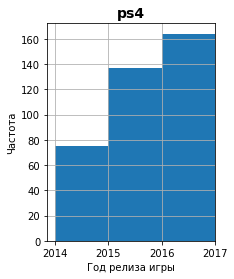

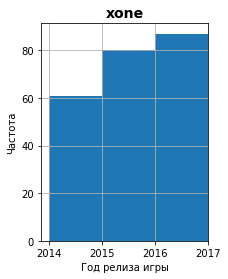

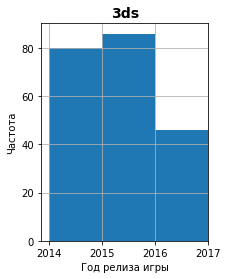

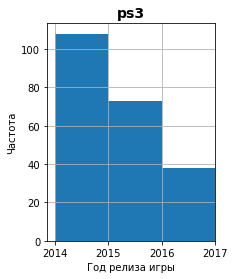

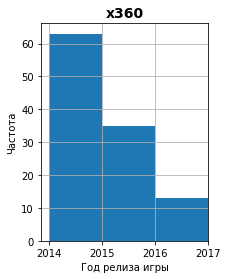

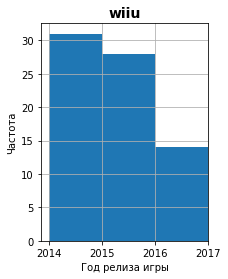

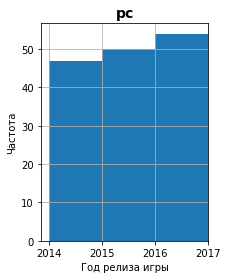

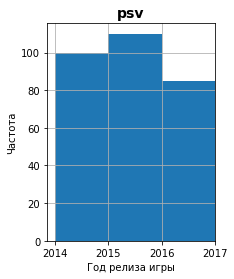

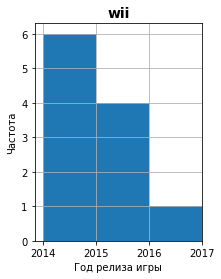

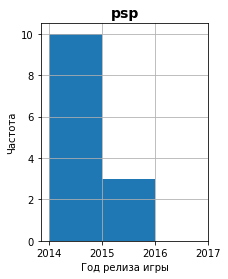

In [46]:
#С помощью гистограмм определим динамику продажи игр на актуальных платформах
for j in range(0, len(rel_platform_sales_sum.index)):
    bins_years = [2014, 2015, 2016, 2017]
    df_relevant[df_relevant['platform']==rel_platform_sales_sum.index[j]]\
    .plot(kind='hist', bins= bins_years, legend=False, title=rel_platform_sales_sum.index[j], figsize=(3, 4), grid=True).set_xlim(right=2017)
    
    plt.title(label=rel_platform_sales_sum.index[j], fontsize=14, fontweight="bold")
    plt.xlabel("Год релиза игры")
    plt.ylabel("Частота")

В актуальном периоде, который мы выбрали, из 31 платформы остались только 10. 
* Из этих 10 платформ PSP можно исключить из потенциально прибыльных платформ, т.к. у PSP продажи практически равно нулю. 
* На платформе wii за последний год вышла только одна игра. С учетом того, что платформа существует уже 10 лет при среднем для платформ 9г. и выходом нового поколения wiiu, эту платформу также не будем учитывать.

Список потенциально прибыльных платформ в актуальном периоде выглядит так:

In [47]:
relevant_platforms = ['ps4', 'xone', '3ds', 'ps3', 'x360', 'pc', 'psv', 'wiiu']

In [48]:
df_relevant = df_relevant.query('platform in @relevant_platforms')

(0.0, 2.0)

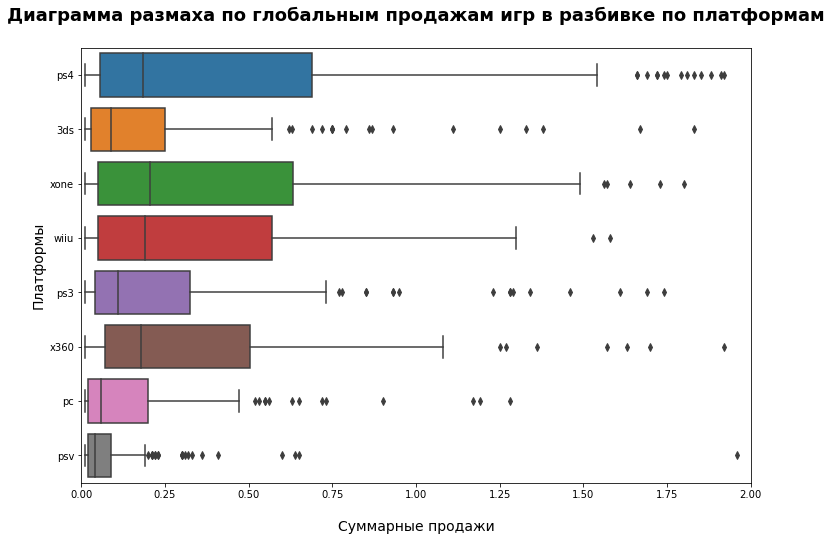

In [49]:
# построим все "ящики с усами" на одном графике для удобства

plt.figure(figsize=(12,8))
sns.boxplot(data=df_relevant, x='total_sales', y='platform')

plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке по платформам\n', fontsize=18, fontweight="bold")
plt.xlabel("\nСуммарные продажи", fontsize=14)
plt.ylabel("Платформы", fontsize=14)
plt.xlim(0, 2)

На диаграмме размаха видно, что медиана примерно равна у трех платформ с большими продажами: ps4, xone, x360. Однако межквартильный размах у платформ ps4 и xone больше, что говорит о бОльшей потенциальной прибыльности. С большим отрывом платформы со средними продажами игр - 3dc, pc3, pc. Минимальное количество игр продается на платформе psv

#### Зависимость продаж от оценок критиков

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

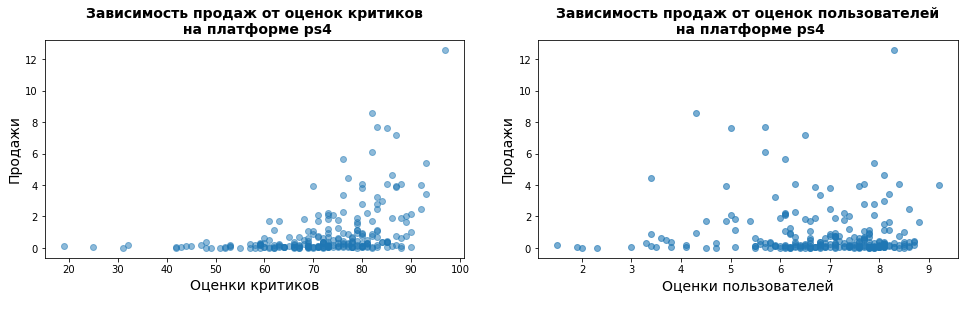

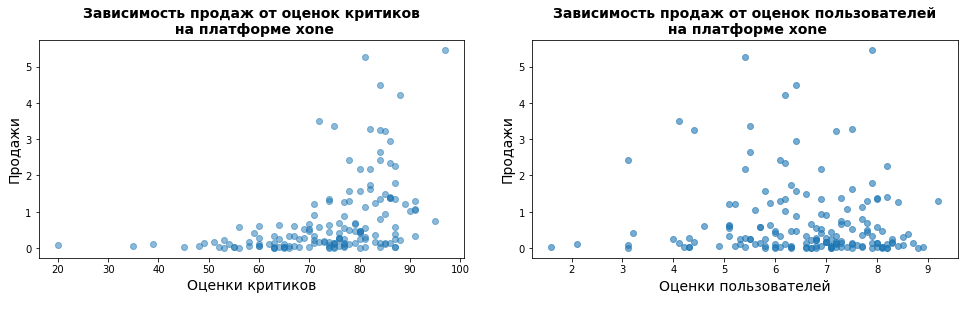

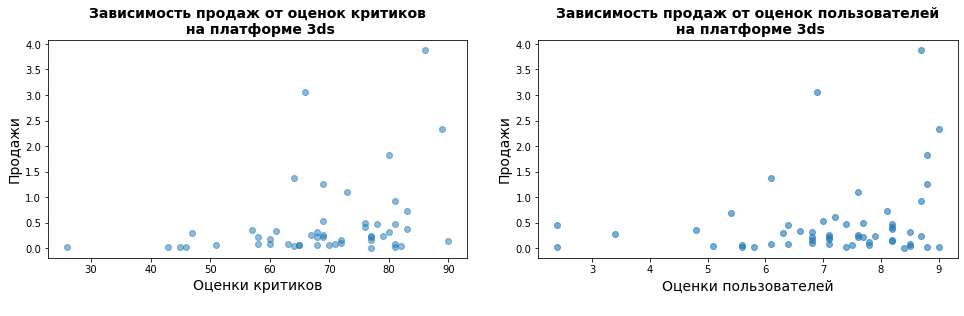

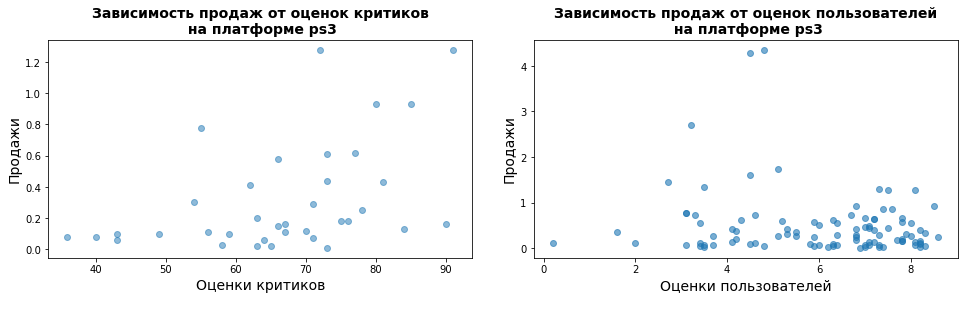

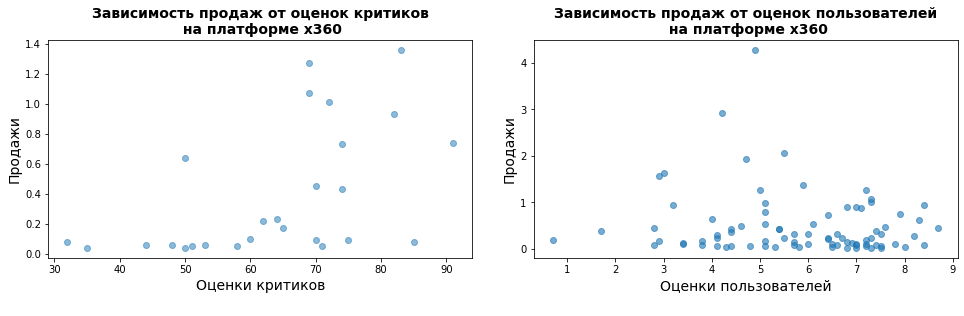

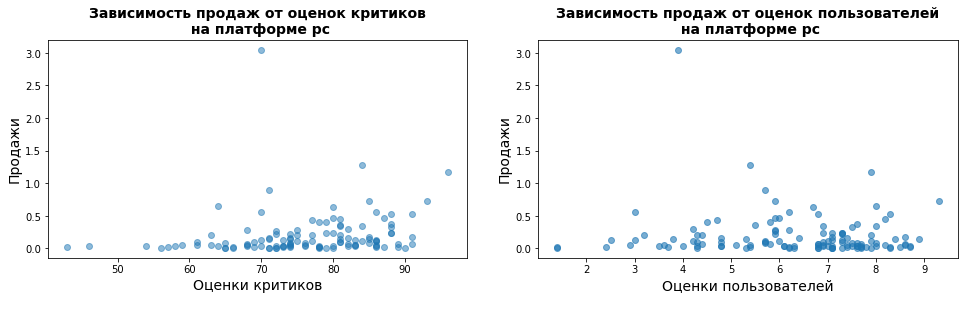

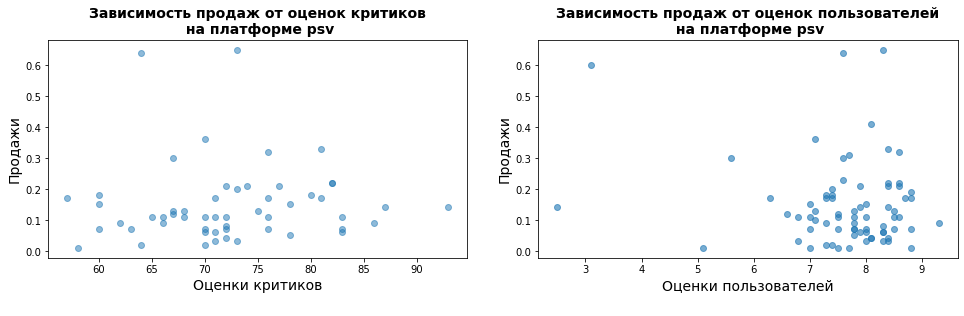

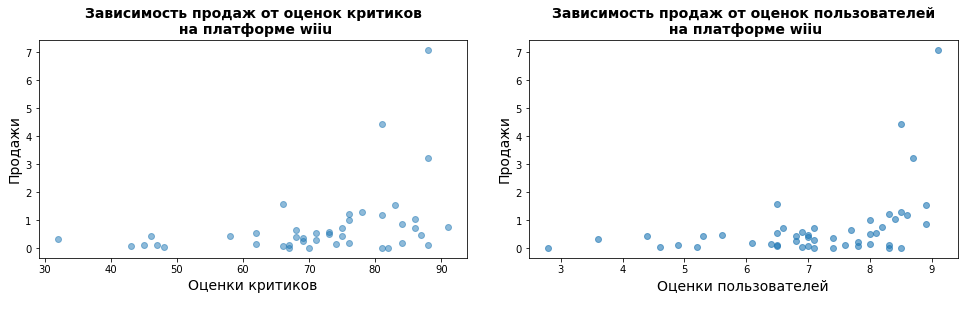

In [50]:
# используем цикл для построения диаграмм рассеяния
for name_platform in relevant_platforms:
    x_critic = df_relevant.dropna(subset=['critic_score']).loc[(df_relevant['platform'] ==name_platform),'critic_score']
    y_critic = df_relevant.dropna(subset=['critic_score']).loc[(df_relevant['platform'] ==name_platform),'total_sales']
    
    x_user = df_relevant.dropna(subset=['user_score_no_tbd']).loc[(df_relevant['platform'] ==name_platform),'user_score_no_tbd']
    y_user = df_relevant.dropna(subset=['user_score_no_tbd']).loc[(df_relevant['platform'] ==name_platform),'total_sales']
    
    
    fig = plt.figure(figsize=(13.5, 4.5))
    
    ax1 = fig.add_subplot(121)
    ax1.scatter(x_critic, y_critic, alpha = 0.5)
    ax1.set_title('Зависимость продаж от оценок критиков\n на платформе '+name_platform, fontsize=14, fontweight="bold")
    ax1.set_xlabel('Оценки критиков\n', fontsize=14)
    ax1.set_ylabel('Продажи', fontsize=14)
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(x_user, y_user, alpha = 0.6)
    ax2.set_title('Зависимость продаж от оценок пользователей\n на платформе '+name_platform, fontsize=14, fontweight="bold")
    ax2.set_xlabel('Оценки пользователей\n', fontsize=14)
    ax2.set_ylabel('Продажи', fontsize=14)
    
    plt.tight_layout(w_pad=3)

In [51]:
#Циклом посчитаем коэффициент корреляции 
print('Коэффициент корреляции')
print('{: <30}|{: <30}'.format('продажи и оценки критиков', 'продажи и оценки пользователей'))
print()
for name_platform in relevant_platforms:
    print(name_platform)
    print('{: <30.2}{: <30.2}'.format(df_relevant[df_relevant['platform']==name_platform]['total_sales']\
                                   .corr(df_relevant[df_relevant['platform']==name_platform]['critic_score'])\
                                   
                                   , df_relevant[df_relevant['platform']==name_platform]['total_sales']\
                                   .corr(df_relevant[df_relevant['platform']==name_platform]['user_score_no_tbd'])))
    print()

Коэффициент корреляции
продажи и оценки критиков     |продажи и оценки пользователей

ps4
0.4                           -0.04                         

xone
0.43                          -0.07                         

3ds
0.31                          0.22                          

ps3
0.45                          -0.17                         

x360
0.53                          -0.14                         

pc
0.17                          -0.072                        

psv
0.043                         -0.17                         

wiiu
0.37                          0.41                          



Исходя из графиков расеяния можно сказать, что объем продаж довольно резко возрастает при оценке критиков от 70 и выше, до этой отметки продажи малы.
Зависимость продаж от оценок пользователей менее выраженная, но можно сказать, что продажи растут начиная с отметок в 6 баллов

В целом коэффициент корреляции показывает, что зависимость продаж от оценок критиков сильнее, чем от оценок пользователей. За исключением платформ WiiU и PSV, где коэффициент корреляции примерно одинаков.

#### Распределение выпущенных игр по жанрам

Общее распределение игр по жанрам

<AxesSubplot:ylabel='genre'>

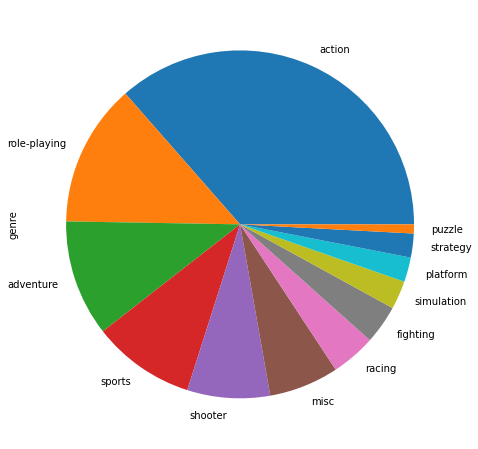

In [52]:
df_relevant['genre'].value_counts().plot(kind='pie', figsize=(8, 8), legend=False)

Жанр Action явлется наиболее востребованным, далее идут игры ролевые, приключения, спортивные и шутеры. Наименьшее количество игр в жанре Puzzle

<AxesSubplot:xlabel='genre'>

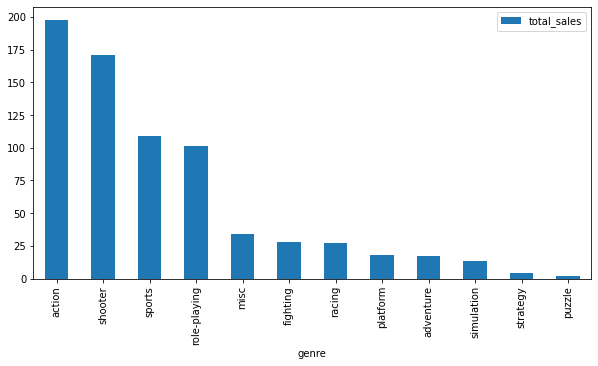

In [53]:
#Посмотрим как распределяются продажи в зависимости от жанра игры:
(
    df_relevant
                   .pivot_table(index='genre', aggfunc={'total_sales':sum})
                   .sort_values(by='total_sales', ascending=False)
                   .plot(y='total_sales', kind='bar', figsize=(10, 5))
)

(0.0, 3.0)

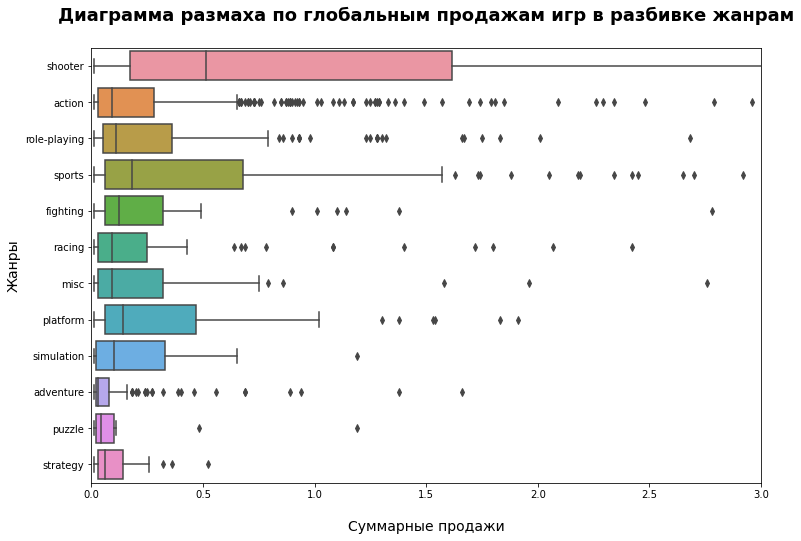

In [54]:
# построим даграмму размаха

plt.figure(figsize=(12,8))
sns.boxplot(data=df_relevant, x='total_sales', y='genre')

plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке жанрам\n', fontsize=18, fontweight="bold")
plt.xlabel("\nСуммарные продажи", fontsize=14)
plt.ylabel("Жанры", fontsize=14)
plt.xlim(0, 3)

(0.0, 2.5)

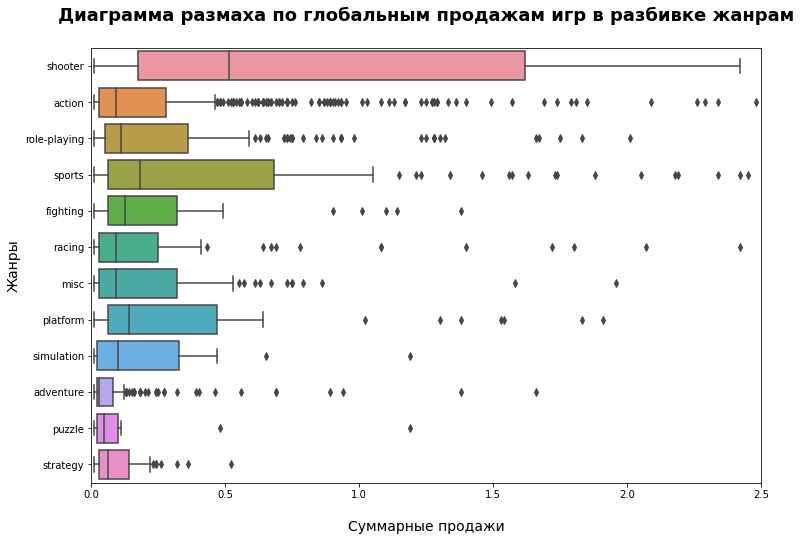

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_relevant, x='total_sales', y='genre', whis = 0.75)

plt.title(label='Диаграмма размаха по глобальным продажам игр в разбивке жанрам\n', fontsize=18, fontweight="bold")
plt.xlabel("\nСуммарные продажи", fontsize=14)
plt.ylabel("Жанры", fontsize=14)
plt.xlim(0, 2.5)

Жанр Shooter лидирует по объему продаж, медианный уровень дохода по нему гораздо выше остальных жанров. Второй по объему продаж жанр - спортивные и платформеры. Несмотря на большое количество игр в жанре action, доход по ним не большой: они либо хуже продаются, либо дешевле стоят.

### Портрет пользователя каждого региона

Составим портрет пользователя для каждого региона (NA, EA, JP)

In [56]:
data_games = df
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')
data_games['rating'] = data_games['rating'].fillna('unknown')
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [57]:
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.platform,
               
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

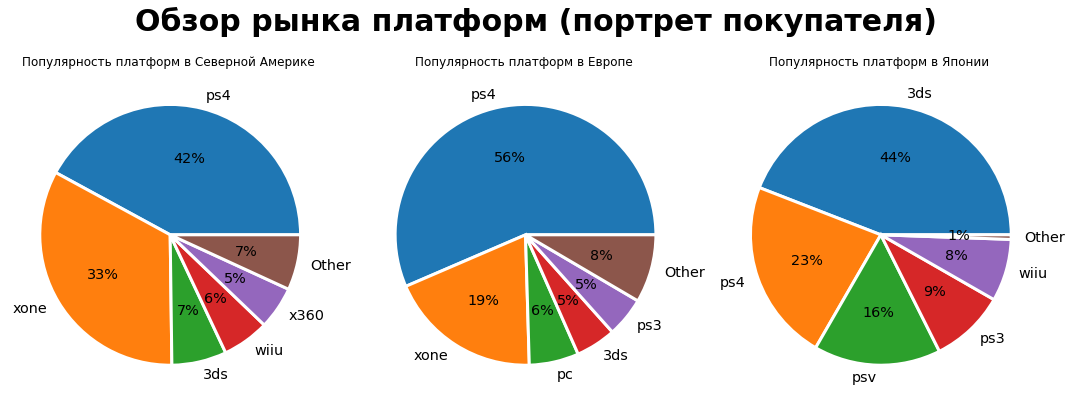

In [58]:
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

graph(data_games, 2015, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, 2015,'eu_sales', 'Европе', axes[1])
graph(data_games, 2015, 'jp_sales', 'Японии', axes[2])

#### Распределение объемов продаж по платформам в регионах

В Европе и в Северной Америке самая популярная платформа PS4, в Японии - Nintendo 3DS. Также в лидерах по продажам игр XOne. Уже менее популярной, но все еще актуальной остается приставка PS3

#### Распределение объемов продаж по жанрам в регионах

Для каждого региона посчитаем суммарные продажи по жанрам и определим 5 самых популярных.

In [59]:
genre_per_region = (df_relevant
        .pivot_table(index='genre', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
                         .reset_index()
       )
   
genre_per_region

,genre,eu_sales,jp_sales,na_sales
0,action,74.01,29.38,72.10
1,adventure,6.36,3.55,5.60
2,fighting,6.69,6.37,12.43
3,misc,11.44,5.59,13.59
4,platform,6.80,2.69,6.79
5,puzzle,0.52,0.93,0.65
6,racing,14.13,1.76,8.74
7,role-playing,28.17,31.16,33.47
8,shooter,65.52,4.87,79.02
9,simulation,7.30,2.31,2.63


In [60]:
top5_genre_per_region = genre_per_region.nlargest(5, columns=['eu_sales', 'na_sales', 'jp_sales'])
genre_per_region = genre_per_region.append(
        {'genre': 'other',
         'eu_sales': genre_per_region['eu_sales'].sum() - top5_genre_per_region['eu_sales'].sum(),
        'na_sales': genre_per_region['na_sales'].sum() - top5_genre_per_region['na_sales'].sum(),
        'jp_sales': genre_per_region['jp_sales'].sum() - top5_genre_per_region['jp_sales'].sum()}, ignore_index=True)
genre_per_region.set_index('genre')
top6_genre_per_region = genre_per_region.nlargest(6, columns=['eu_sales', 'na_sales', 'jp_sales']).set_index('genre')
top6_genre_per_region

,eu_sales,jp_sales,na_sales
genre,,,
action,74.01,29.38,72.10
shooter,65.52,4.87,79.02
sports,45.36,3.17,45.98
other,40.90,22.39,42.67
role-playing,28.17,31.16,33.47
racing,14.13,1.76,8.74


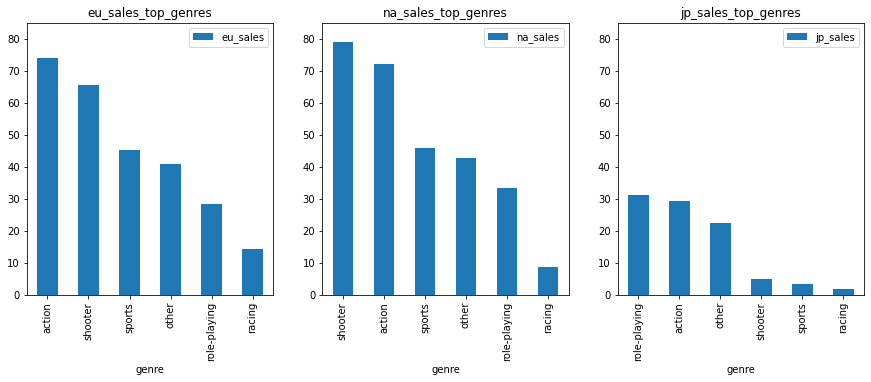

In [61]:
# список регионов для цикла
region = ['eu_sales', 'na_sales', 'jp_sales']

for i in range(0, 3):
    plt.figure(1)
    plt.subplot(1,3,i+1)
    top6_genre_per_region.sort_values(by = region[i], ascending = False)\
    .plot(ax=plt.gca(), y=region[i], kind='bar', figsize=(15, 5), title=region[i]+'_top_genres').set_ylim(top=85)

В Северной Америке наиболее популярными явлются игры в жанре шутер. Пользователи Европы и Америки также предпочитают жанр action. Спортивные игры и ролевые также входят в топ в Европе и Америке, но  с гораздо более низкими продажами. Покупатели из
Японии предпочитают ролевые игры и action. На шутеры и спортивные игры приходится совсем небольшая доля продаж в Японии. Гоночные игры замыкают топ 5 предпочений.

#### Распределение объемов продаж по рейтингу в регионах

Аналогично посмотрим как влияет рейтинг на продажи в каждом регионе.

In [62]:
rating_sum = df_relevant.pivot_table(index='rating', aggfunc={'na_sales':sum, 'eu_sales':sum, 'jp_sales':sum})
  
rating_sum

,eu_sales,jp_sales,na_sales
rating,,,
E,62.17,12.08,58.05
E10+,30.01,4.68,36.34
M,104.90,11.48,111.39
T,38.74,17.37,45.74
not_defined,32.27,47.12,30.46


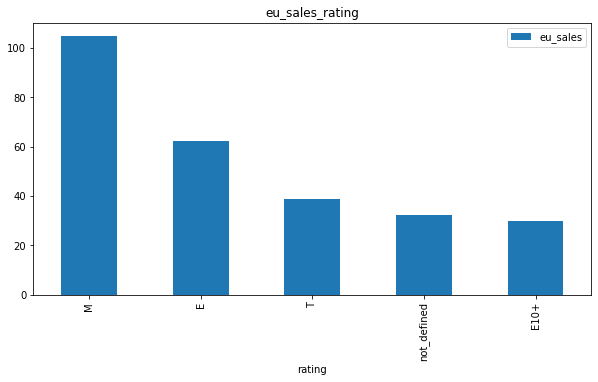

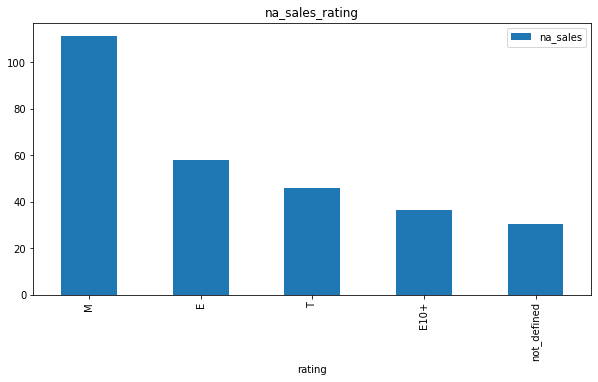

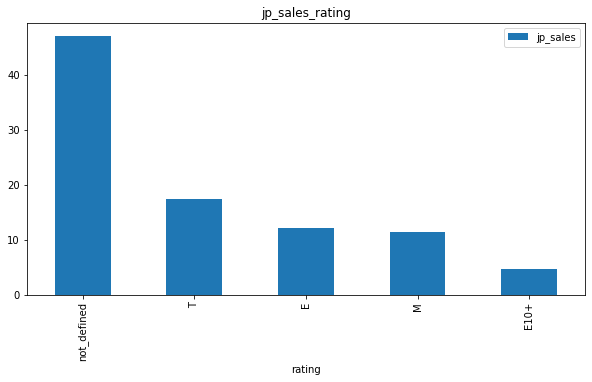

In [63]:
for i in range(0, 3):
    (rating_sum
     .sort_values(by=region[i], ascending=False)
     .plot(y=region[i], kind='bar', figsize=(10, 5), title=region[i]+'_rating')
    )

В Америке и Европе идентичное распределение продаж в зависимости от рейтингов: преобладают, с большим отрывом, игры для взрослых, далее игры для всех, на третьем месте игры для тинейджеров.

Рейтинг ESRB применяется  в США и Канаде. Поэтому в Японии такое большое количество игр с неопреденным возрастным ограничением. В связи с этим, сложно корректно интерпретировать данные.

В целом можно сказать, что американцы и европейцы схожи в выборе платформ, жанров и возрастного рейтинга игр. Покупатели из Японии сильно отличаются в предпочтениях от западных игроков.

### Проверка гипотезы

Первая гипотеза которую нужно проверить - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую и альтернативную гипотезы:

H0 - средние пользовательские рейтинги платформ Xbox One и PC равны;
H1 - средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC .
Альтернативная гипотеза у нас двусторонняя, т.к. средний рейтинг может отличаться от как в большую так и в меньшую сторону.

In [64]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df.loc[(df['platform'] =='xone'),['user_score_no_tbd']].dropna(subset=['user_score_no_tbd']), 
    df.loc[(df['platform'] =='pc'),['user_score_no_tbd']].dropna(subset=['user_score_no_tbd']), equal_var = False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


[4.5385803e-06]
Отвергаем нулевую гипотезу


Средний пользовательский рейтинг платформы Xbox One отличается от среднего пользовательского рейтинга платформы PC

Вторая гипотеза для проверки звучит так - средние пользовательские рейтинги жанров Action и Sports разные.

H0 - средние пользовательские рейтинги жанров Action и Sports равны;
H1 - средние пользовательские рейтинги жанров Action и Sports различаются.

In [65]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df.loc[(df['genre'] =='action'),['user_score_no_tbd']].dropna(subset=['user_score_no_tbd']), 
    df.loc[(df['genre'] =='sports'),['user_score_no_tbd']].dropna(subset=['user_score_no_tbd']), equal_var = False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


[0.07370217]
Не получилось отвергнуть нулевую гипотезу


Следовательно, средние пользовательские рейтинги жанров Action и Sports равны

In [66]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Вывод

Проведя исследовательский анализ данных о продажах видеоигр можно сказать следующее:

- В первую очередь следует обратить внимание на потенциально прибыльные игровые платформы. Наиболее доходными актуальными являются 'PS4', 'X360', 'XOne'. Продажи по платформе 'PS3' падают, но все еще могут принести некоторую прибыль. Нужно иметь ввиду что в разных регионах популярные платформы могут отличаться, например платформа 3DS очень популярна в Японии, но менее популярна в Европе и Америке. Платформы 3DS, PS3, PS4 популярны во всех регионах.
- Среди жанров видеоигр также можно выделить наиболее популярные и перспективные, например жанр Shooter перспективный во всех регионах, а также жанры Sports и Platform являются потенциально прибыльными. Следует быть аккуратными с таким жанром как Action. Несмотря на то, что игры с таким жанром занимают серьезную долю рынка в количественном отношении, их продажи очень невысоки.
- Многие игры не имеют рейтинга ESRB, однако, можно сказать, что наиболее популярны игры для взрослых и для любого возраста.
- В условиях ограниченности данных, мы не сможем оценить какие действия повлияли на рост продаж в рамках нашего проекта. 
Достаточно много игр с высокой оценкой критиков и слабой выручкой
- В целом пользователи из регионов Европа и Северная Америка очень схожи в своих предпочтених и продвигать на рынке можно в рамках одной рекламной компании. 